# Studi Kasus Kualitas Red Wine Vinho Verde samples

# Tujuan Analisis

Pekerjaan ini menunjukkan, bagaimana analisis statistik dapat digunakan untuk mengidentifikasi komponen-komponen yang utama mengontrol kualitas dari anggur merah vinho verde sebelum produksi. Ini akan membantu pabrikan untuk mengontrol kualitas sebelum produksi anggur. Selain itu dari hasil analisis  data ini diharapkan dapat memberikan panduan bagi kebun anggur mengenai kualitas dan harga yang diharapkan dari produk mereka tanpa terlalu bergantung pada volatilitas pencicip anggur. Dua kumpulan data disertakan, terkait dengan sampel anggur vinho verde merah, dari utara Portugal. Tujuannya adalah untuk memodelkan kualitas anggur berdasarkan uji fisikokimia. Data dikumpulkan mengenai 12 sifat anggur yang berbeda, salah satunya adalah Kualitas, berdasarkan Quality, based on sensory data, density, acidity, alcohol content, dan lain-lain. 

# Data Understanding

## Deskripsi Data

### Mengetahui kualitas anggur (wine quality)

Wine merupakan minuman beralkohol yang terbuat dari hasil fermentasi anaerob jus buah anggur tanpa kehadiran O2. Keseimbangan sifat alami yang terkandung pada buah anggur dapat menyebabkan buah tersebut difermentasi tanpa penambahan gula, asam, enzyme, maupun
nutrisi lain. Pembuatan wine dengan cara fermentasi jus buah anggur ini menggunakan khamir tertentu yang kemudian kandungan gula yang ada pada buah anggur tersebut akan dikonsumsi oleh yeast (ragi) dan mengubahnya menjadi alcohol. Jenis anggur yang berbeda dan strain khamir yang digunakan, tergantung pada jenis wine yang akan di produksi. Dalam memproduksi wine, komposisi yang digunakan harus mempunyai kandungan nutrisi tinggi, mempunyai keasaman yang tinggi sehingga dapat menghambat pertumbuhan mikroba yang tidak diinginkan, kandungan gula cukup tinggi dan aroma yang sedap, oleh itu qualitas wine harus diutamakan.

<img src="image-20240425-190617.png" width="50%" align="" />

Fitur yang digunakan dalam dataset ini yaitu:

- fixed_acidity

- volatile_acidity

- citric_acid

- residual_sugar

- chlorides

- free_sulfur_dioxide

- total_sulfur_dioxide	

- density

- pH

- sulphates

Dalam dataset ini menggunakan 1 class yaitu class quality.

### Menampilkan Data dari Database

In [ ]:
df_2 = _deepnote_execute_sql('select * from wine', 'SQL_C489CCAC_4E04_45A8_9AFE_862B142176EB', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_2

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1355,7.2,0.58,0.03,2.3,0.077,7,28,0.99568,3.35,0.52,10.0,5
1355,1356,6.1,0.32,0.25,1.8,0.086,5,32,0.99464,3.36,0.44,10.1,5
1356,1357,6.1,0.34,0.25,1.8,0.084,4,28,0.99464,3.36,0.44,10.1,5
1357,1358,7.3,0.43,0.24,2.5,0.078,27,67,0.99648,3.60,0.59,11.1,6


### Feature

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1359 non-null   int64  
 1   fixed_acidity         1359 non-null   float64
 2   volatile_acidity      1359 non-null   float64
 3   citric_acid           1359 non-null   float64
 4   residual_sugar        1359 non-null   float64
 5   chlorides             1359 non-null   float64
 6   free_sulfur_dioxide   1359 non-null   int64  
 7   total_sulfur_dioxide  1359 non-null   int64  
 8   density               1359 non-null   float64
 9   pH                    1359 non-null   float64
 10  sulphates             1359 non-null   float64
 11  alcohol               1359 non-null   float64
 12  quality               1359 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 138.2 KB


Diatas ini merupakan info dari dataset yang kita gunakan dari nomer 1 hingga 11 merupakan fitur dan quality termasuk kedalam class dari dataset.  Dari info diatas juga menjelaskan tipe data yang digunakan yaitu numerik. Berikut penjelasan tentang setiap fitur:

- Fixed acidity :Ini menunjukkan jumlah asam tartarat dalam anggur yang diukur dalam satuan g/dm3. Asam tetap yang dominan ditemukan dalam anggur adalah tartarat, malat, sitrat, dan suksinat. Tingkat masing-masing yang ditemukan dalam anggur dapat sangat bervariasi tetapi secara umum kita akan melihat 1.000 hingga 4.000 mg/L asam tartarat, 0 hingga 8.000 mg/L asam malat, 0 hingga 500 mg/L asam sitrat, dan 500 hingga 2.000 mg/L asam suksinat. 
Kita dapat mengukur fixed acidity dalam suatu larutan dengan berbagai metode kimia. Salah satu metode yang umum digunakan adalah titrasi, di mana Anda menambahkan larutan basa dengan konsentrasi yang diketahui secara bertahap ke dalam larutan yang akan diukur keasamannya. Ketika titrasi telah mencapai titik ekuivalen, di mana jumlah basa yang ditambahkan sama dengan jumlah asam dalam larutan, Anda dapat menghitung konsentrasi asam dalam larutan tersebut. Untuk mengukur fixed acidity dalam anggur, misalnya, sampel anggur akan diencerkan dengan air kemudian dititrasi dengan larutan basa seperti larutan natrium hidroksida (NaOH) dengan indikator pH untuk menentukan titik ekuivalen.

- Volatile acidity : Ini menunjukkan jumlah asam asetat dalam anggur yang diukur dalam g/dm3. Volatle acidity ini mengacu pada asam yang dapat disuling dengan uap yang ada dalam anggur, terutama asam asetat tetapi juga asam laktat, format, butirat, dan propionat. Umumnya, asam-asam ini diukur dengan Cash Still, meskipun sekarang asam-asam ini dapat diukur dengan kromatografi gas, HPLC, atau metode enzimatik. Tingkat rata-rata asam asetat dalam anggur meja kering baru kurang dari 400 mg/L, meskipun kadarnya berkisar dari tidak terdeteksi hingga 3g/L. Cara untuk mengukur volatile acidity serupa dengan mengukur fixed acidity, tetapi dengan fokus pada asam-asam yang mudah menguap. Salah satu metode yang umum digunakan adalah distilasi. Dalam metode ini, sampel anggur dipanaskan dalam sistem distilasi yang memungkinkan asam-asam yang mudah menguap untuk terpisah dari komponen lain dalam larutan. Uap yang dihasilkan kemudian dikondensasi kembali menjadi cairan, dan konsentrasi asam-asam yang mudah menguap ini kemudian diukur dalam fraksi yang diperoleh. Metode lainnya termasuk penggunaan instrumen seperti spektrofotometer gas untuk menganalisis komposisi gas dalam sampel, yang memungkinkan pengukuran konsentrasi asam-asam yang mudah menguap seperti asam asetat.

- Citric acid : Citric acid atau asam sitrat adalah garam asam. Senyawa ini berbentuk kristal putih seperti gula pasir.Asam sitrat secara alami terdapat pada buah jeruk terutama lemon dan jeruk nipis Fungsi utama asam sitrat adalah sebagai bahan pengasam, selain itu juga berfungsi sebagai komponen penting dalam metabolisme energi dalam tanaman dan juga berperan dalam siklus asam sitrat (siklus Krebs) dalam metabolisme aerobik pada hewan dan manusia.  Produsen anggur dapat menambahkan citric acid ke dalam anggur selama proses pembuatan, terutama jika anggur memiliki tingkat keasaman yang rendah atau jika mereka ingin memberikan rasa segar dan cerah. Penambahan ini harus dilakukan dengan hati-hati dan berdasarkan analisis kimia yang cermat untuk memastikan keseimbangan rasa yang diinginkan. Ada juga penelitian yang menunjukkan bahwa anggur yang disimpan atau diolah di dalam tong kayu tertentu, terutama tong yang terbuat dari kayu yang mengandung lebih banyak asam sitrat, dapat meningkatkan kandungan asam sitrat dalam anggur. Namun, efek ini mungkin lebih berkaitan dengan interaksi antara anggur dan kayu, bukan penambahan langsung asam sitrat.

- Residual sugar : Residual sugar adalah istilah yang umum digunakan dalam industri anggur untuk menggambarkan jumlah gula yang tersisa dalam anggur setelah fermentasi. Ini merupakan faktor penting dalam menentukan tingkat kemanisan suatu wine. Dalam panduan ini, kita akan mengeksplorasi konsep sisa gula dalam anggur dan bagaimana pengaruhnya terhadap rasa dan gaya anggur secara keseluruhan. Residual sugar diukur dalam g/dm3. Tingkat sisa gula dalam anggur dapat sangat memengaruhi rasa dan gayanya. Anggur tanpa sisa gula diklasifikasikan sebagai anggur kering. Anggur ini cenderung memiliki rasa yang renyah dan menyegarkan tanpa rasa manis yang terlihat. Anggur kering sering kali disukai dengan hidangan gurih atau dinikmati sendiri. Anggur semi-kering memiliki sedikit sisa gula, biasanya berkisar antara 0,6% hingga 2%. Anggur ini memiliki rasa manis halus yang menyeimbangkan keasaman dan menambah kedalaman rasa. Anggur semi-kering serbaguna dan cocok dipadukan dengan berbagai makanan. Salah satu cara untuk mempertahankan gula sisa dalam anggur adalah dengan menghentikan fermentasi sebelum semua gula diubah menjadi alkohol oleh ragi. Ini bisa dilakukan dengan menghentikan fermentasi secara kimia (dengan menambahkan sulfat atau memperendah suhu) atau secara fisik (dengan menghilangkan ragi atau mendinginkan anggur).

- Free sulfur dioxide : Free sulfur dioxide diukur dalam larutan model dengan zat pengikat SO2 yang berbeda (α-ketoglutarat, piruvat, asetaldehida, glukosa, fruktosa, dan malvidin-3-glukosida) serta berbagai anggur putih dan merah serta sari buah apel. Metode CE dibandingkan dengan tiga metode konvensional untuk mengukur SO2 bebas, yaitu metode Ripper, Aerasi-Oksidasi (AO), dan pararosanilin dengan discrete analisar (DA). Meskipun beberapa perbedaan yang signifikan secara statistik (p<0,05) ditemukan antara keempat metode dalam larutan model tidak berpigmen dan sampel, nilai-nilai tersebut secara umum disepakati. Dengan adanya antosianin dalam larutan model dan anggur merah, nilai SO2 bebas yang ditemukan dengan CE secara signifikan lebih rendah dibandingkan tiga metode lainnya (p<0,05). Perbedaan nilai yang ditemukan oleh Ripper dan CE berkorelasi kuat dengan kandungan antosianin (R2 = 0,8854) dan bahkan lebih kuat lagi ketika memperhitungkan pigmen polimer (R2 = 0,9251). Free sulfur dioxide diukur dalam g/dm3.

- Total sulfur dioxide : Metode yang paling umum digunakan untuk penentuan total SO adalah metode aerasi/oksidasi (AO), yang kadang-kadang dikenal sebagai metode Monier/Williams atau Rankine/Pocock, dan merupakan dasar dari salah satu metode OIV (OIV) yang disetujui. -MA-AS323-04A). Pada dasarnya, analisis ini melibatkan pemanasan sampel anggur yang diasamkan untuk melepaskan SO, dalam bentuk molekul. Aliran udara (2) kemudian digunakan untuk membawa SO yang dibebaskan, ke reservoir hidrogen peroksida di mana ia dioksidasi untuk membentuk asam sulfat. Asam sulfat yang dihasilkan kemudian dititrasi dengan natrium hidroksida encer untuk menentukan jumlah asam yang terbentuk dan, karenanya, jumlah awal SO dalam anggur. Bahan kimia ini berfungsi sebagai antioksidan dan agen antimikroba.

- Density : Ini menunjukkan kepadatan anggur yang diukur dalam g/dm3. Kepadatan anggur ditentukan oleh jumlah gula, alkohol, dan zat terlarut lainnya yang ada dalam anggur. Umumnya, semakin tinggi kandungan gula dan alkohol, semakin tinggi pula kepadatan wine tersebut. Massa jenis biasanya diukur menggunakan hidrometer atau refraktometer, yang memberikan nilai numerik yang dikenal sebagai berat jenis. Nilai ini menunjukkan massa jenis anggur dalam kaitannya dengan massa jenis air. Misalnya, berat jenis 1.000 berarti anggur memiliki kepadatan yang sama dengan air, sedangkan berat jenis yang lebih tinggi menunjukkan anggur yang lebih padat. Kepadatan anggur dapat berdampak signifikan terhadap kualitas dan strukturnya. Anggur dengan kepadatan lebih tinggi cenderung memiliki rasa yang lebih kaya di mulut dan karakter yang lebih penuh. Mereka sering kali menunjukkan rasa dan aroma yang lebih nyata karena konsentrasi zat terlarut yang lebih tinggi. Sebaliknya, wine dengan kepadatan lebih rendah mungkin terasa lebih ringan dan lembut di langit-langit mulut, dengan rasa dan aroma yang halus. Penting untuk diperhatikan bahwa kepadatan saja tidak menentukan kualitas anggur, karena faktor lain seperti keasaman, tanin, dan keseimbangan juga berperan.

- pH : Ini menunjukkan nilai pH anggur. Skala pH berkisar dari 0 hingga 14, di mana nilai 7 menunjukkan larutan netral, nilai di bawah 7 menunjukkan larutan asam, dan nilai di atas 7 menunjukkan larutan basa. Untuk anggur, pH umumnya berkisar antara sekitar 2,8 hingga 4,0, dengan rata-rata sekitar 3,2 hingga 3,6. Tingkat pH anggur memiliki dampak signifikan pada karakteristik dan kualitas keseluruhan dari anggur, karena pH memengaruhi banyak aspek organoleptik (rasa, aroma, dan tekstur) serta stabilitas dan kemampuan penuaan anggur. Untuk mengukur pH anggur, kita memerlukan pH meter atau kertas indikator pH. Langkah-langkah umum untuk mengukur pH anggur meliputi  mengambil sampel anggur yang akan diukur pH-nya yang mewakili anggur secara keseluruhan dengan mencampurkan anggur yang ada di beberapa bagian tong atau botol. kemudian, Jika kita menggunakan pH meter, pastikan untuk mengkalibrasi perangkat tersebut terlebih dahulu sesuai petunjuk yang tertera pada manual pengguna. Kalibrasi penting untuk memastikan akurasi pengukuran, Jika kita menggunakan pH meter, siapkan alat tersebut dengan menyalakan dan menyiapkan elektroda pH. Jika Anda menggunakan kertas indikator pH, siapkan strip kertas dan tempatkan di atas sampel anggur. setelah itu, Tuangkan atau celupkan pH meter atau strip kertas ke dalam sampel anggur. Pastikan sensor pH meter atau strip kertas tercelup dengan baik ke dalam larutan. Jika menggunakan pH meter, tunggu beberapa saat hingga nilai pH stabil dan terbaca pada layar. Jika menggunakan strip kertas, tunggu beberapa saat dan bandingkan warna strip dengan skala warna yang disertakan dengan strip tersebut untuk menentukan nilai pH.

- Sulphates : Ini menunjukkan jumlah kalium sulfat dalam anggur. Itu juga diukur dalam g/dm3. Dalam konteks anggur, sulfat (sering kali dieja sebagai "sulphates" dalam bahasa Inggris) mengacu pada senyawa sulfat, terutama kalium sulfat (K2SO4), yang sering digunakan dalam industri anggur sebagai aditif. Kalium sulfat adalah salah satu bahan kimia yang diizinkan dalam pembuatan anggur sesuai dengan regulasi pangan yang berlaku. Ini digunakan terutama untuk memperkuat rasa dan kestabilan anggur. Penggunaan kalium sulfat dapat mempengaruhi pH, keseimbangan mineral, dan karakteristik organoleptik anggur, termasuk rasa dan tekstur. Jumlah sulfat dalam anggur dapat bervariasi tergantung pada praktik enologi yang digunakan oleh produsen anggur. Untuk mengukur kandungan sulfat dalam sebuah larutan, kita dapat menggunakan berbagai metode kimia. Salah satu metode yang umum digunakan adalah metode gravimetri, di mana sulfat dalam larutan diendapkan sebagai garam sulfat yang mudah terlarut. Selain metode gravimetri, metode lain seperti titrasi juga dapat digunakan untuk mengukur kandungan sulfat dalam larutan. Dalam titrasi, larutan yang mengandung sulfat dititrasi dengan larutan standar yang berisi ion klorida (seperti larutan perak nitrat) untuk membentuk endapan yang terukur. Jumlah ion klorida yang bereaksi dengan sulfat kemudian dapat digunakan untuk menghitung kandungan sulfat dalam larutan yang diuji.

- Alcohol : Ini menunjukkan kandungan alkohol dalam anggur. Dalam konteks anggur hal ini mengacu pada kandungan alkohol etanol dalam anggur. Kandungan alkohol adalah salah satu faktor penting yang memengaruhi karakteristik organoleptik (rasa, aroma, dan tekstur) serta kualitas keseluruhan dari suatu anggur. Kisaran konsentrasi total dalam anggur adalah antara 100-500 mg/L. Guymon dan Heitz, 1952 (dikutip dalam Boulton et al 1996) melaporkan kisaran konsentrasi berikut untuk anggur putih (162 – 266 mg/L) dan untuk anggur merah (140 – 417 mg/L) yang diproduksi di California. Kandungan alkohol dalam anggur biasanya diukur sebagai persentase volume alkohol (% vol) dan berkisar antara sekitar 5% hingga 20%, meskipun sebagian besar anggur mengandung sekitar 9% hingga 16% alkohol. Pentingnya kandungan alkohol dalam kualitas anggu  terletak pada seimbangnya dengan karakteristik lainnya, seperti tingkat keasaman, rasa buah, tannin, dan aroma. Untuk mengukur kandungan alkohol dalam anggur, terdapat beberapa metode yang umum digunakan di industri anggur seperti Metode Refraktometri.  Metode ini memanfaatkan sifat optik gula dan alkohol dalam anggur. Refraktometer digunakan untuk mengukur indeks refraksi dari larutan anggur. Dengan memonitor perubahan indeks refraksi dari awal hingga akhir fermentasi, Anda dapat mengestimasi jumlah gula yang telah difermentasi menjadi alkohol. Namun, perhitungan ini memerlukan asumsi tentang kontribusi gula lainnya dalam anggur yang tidak diubah menjadi alkohol.

- Quality : Menunjukkan kualitas anggur, yang berkisar antara 1 hingga 10. Di sini, semakin tinggi nilainya, semakin baik anggur tersebut.

### Penjelasan Class

In [ ]:
df_2.value_counts('quality')

quality
5    575
6    540
7    179
4     44
8     15
3      6
Name: count, dtype: int64

Dari hasil diatas menunjukkan bahwa class dalam dataset yang digunakan ada di dalam kolom quality dengan jumlah 6 class, yaitu :

- 3

- 4

- 5

- 6

- 7

- 8

## Identifikasi kualitas data

### Identifikasi Outlier

LOF membandingkan kepadatan titik data tertentu dengan kepadatan tetangganya. Karena pencilan berasal dari area dengan kepadatan rendah, rasionya akan lebih tinggi untuk titik data yang anomali. Sebagai aturan praktis, titik data normal memiliki LOF antara 1 dan 1,5 sedangkan pengamatan anomali akan memiliki LOF yang jauh lebih tinggi. Semakin tinggi LOF, semakin besar kemungkinan terjadinya outlier. Jika LOF titik X adalah 5, berarti kepadatan rata-rata tetangga X adalah 5 kali lebih tinggi dari kepadatan lokalnya.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

df_wine = df_2
# df_wine

# simpan quality
wine_quality = df_wine[['quality']]

# #hapus kolom yang tidak diperlukan
df_wine = df_wine.drop(['quality'], axis=1)
# df_wine
# df_wine.coloumns

# # Inisialisasi dan fit model LOF
lof = LocalOutlierFactor(n_neighbors=4, contamination=0.1)  # Set parameter LOF
outlier_labels = lof.fit_predict(df_wine)

# # Tambahkan label outlier dan quality k cve dataframe
df_wine['Outlier'] = outlier_labels
df_wine['quality'] = wine_quality
# df_cleaned = df_wine[df_wine['Outlier'] != -1]

# df_cleaned
df_wine
# print(df_cleaned[['quality','LOF_Score']])

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Outlier,quality
0,1,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,1,5
1,2,7.8,0.88,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,-1,5
2,3,7.8,0.76,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,1,5
3,4,11.2,0.28,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,1,6
4,5,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1355,7.2,0.58,0.03,2.3,0.077,7,28,0.99568,3.35,0.52,10.0,-1,5
1355,1356,6.1,0.32,0.25,1.8,0.086,5,32,0.99464,3.36,0.44,10.1,-1,5
1356,1357,6.1,0.34,0.25,1.8,0.084,4,28,0.99464,3.36,0.44,10.1,-1,5
1357,1358,7.3,0.43,0.24,2.5,0.078,27,67,0.99648,3.60,0.59,11.1,1,6


Penjelasan Code:

dalam code diatas untuk menghitung apakah data di setiap dataset tersebut memiliki data anomali kita hitung setiap fitur yang ada oleh karena itu sebelum menghitung kita simpan terlebih dahulu class atau quality yang ada ke dalam variabel baru. setelah itu kita hapus quality yang ada di dalam dataframe. lakukan perhitungan local outlier factor nya dengan menggunakan library sklearn local outlier factor. setelah mendapatkan nilai outlier dari setiap fitur tampilkan dan gabung kedalam dataframe.

dari hasil perhitungan tersebut dapat kita lihat bahwa dataframe memiliki outlier dengan nilai -1

### Cek Missing Values

disini kita dapat mengetahui apakah data set yang kita gunakan memiliki missing value atau tidak, untuk mengetahui missing valuenya kita dapat menggunakan code dibawah ini:

In [ ]:
df = df_2.isnull().sum()

df

id                      0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

dari code diatas kita dapat mengetahui bahwa dataset yang kita gunakan tidak memiliki missing value. setelah kita mengetahui bahwa data yang digunakan tidak memiliki missing value berikutnya kita cari apakah dataset ini memiliki data anomali. berikut merupakan cara untuk mengetahui apakah dataset ini memiliki data anomali atau tidak.

# PRE PROCESSING DATA

Data preprocessing merupakan komponen dalam persiapan data, yang mendeskripsikan semua jenis pemrosesan yang dilakukan pada data mentah agar siap dilakukan pemrosesan data lanjutan, seperti visualisasi data dan pembentukan model.

Preprocessing data berfungsi untuk mengubah data menjadi format yang lebih mudah dan efektif. Proses ini menjadi langkah awal yang penting dalam upaya data mining. Selain itu, teknik data preprocessing juga telah diadaptasi untuk melatih model machine learning. Berikut adalah tahapan pra-pemrosesan data yang kemi lakukan pada dataset yang kami miliki:

1. Pembersihan Data (Data Cleaning):
    Data cleaning atau pembersihan data terutama dilakukan sebagai bagian dari data preprocessing untuk membersihkan data dengan mengisi nilai yang hilang, menghaluskan data yang noise, menyelesaikan data yang tidak konsisten, dan menghapus outlier.

2. Penggabungan Data (Data Integration):
    Integrasi data adalah salah satu langkah data preprocessing yang digunakan untuk menggabungkan data yang ada di berbagai sumber menjadi satu penyimpanan data yang lebih besar seperti gudang data atau data warehouse.

## Penanganan Outlier dengan menghapus outlier

untuk penanganan data anomali kita bisa melakukan penghapusan data yang memiliki nilai outlier atau nilai anomali. dalam dataframe duatas kita mengetahui bahwa data anomali memiliki niali -1 maka kita akan menghapus baris data outlier tersebut. berikut merupakan hasil dari pengahpusan data anomali:

In [ ]:
df_wine[df_wine['Outlier'] == -1]

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Outlier,quality
1,2,7.8,0.88,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,-1,5
14,15,8.9,0.62,0.18,3.8,0.176,52,145,0.99860,3.16,0.88,9.2,-1,5
15,16,8.9,0.62,0.19,3.9,0.170,51,148,0.99860,3.17,0.93,9.2,-1,5
34,35,5.2,0.32,0.25,1.8,0.103,13,50,0.99570,3.38,0.55,9.2,-1,5
45,46,4.6,0.52,0.15,2.1,0.054,8,65,0.99340,3.90,0.56,13.1,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,6.9,0.57,0.00,2.8,0.081,21,41,0.99518,3.41,0.52,10.8,-1,5
1354,1355,7.2,0.58,0.03,2.3,0.077,7,28,0.99568,3.35,0.52,10.0,-1,5
1355,1356,6.1,0.32,0.25,1.8,0.086,5,32,0.99464,3.36,0.44,10.1,-1,5
1356,1357,6.1,0.34,0.25,1.8,0.084,4,28,0.99464,3.36,0.44,10.1,-1,5


Diatas kita dapat mengetahui baris yang memiilki nilai outlier. setelah kita mengetahui data outlier tersebut kita dapat melakukan penghapusan data outlier untuk melakukan penanganan nilai anomali.

In [ ]:
df_cleaned = df_wine[df_wine['Outlier'] != -1]

df_cleaned

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Outlier,quality
0,1,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,1,5
2,3,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,1,5
3,4,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,1,6
4,5,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,1,5
5,6,7.4,0.660,0.00,1.8,0.075,13,40,0.99780,3.51,0.56,9.4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,1351,9.0,0.600,0.29,2.0,0.069,32,73,0.99654,3.34,0.57,10.0,1,5
1351,1352,7.2,0.620,0.01,2.3,0.065,8,46,0.99332,3.32,0.51,11.8,1,6
1352,1353,7.6,0.645,0.03,1.9,0.086,14,57,0.99690,3.37,0.46,10.3,1,5
1353,1354,7.6,0.645,0.03,1.9,0.086,14,57,0.99690,3.37,0.46,10.3,1,5


In [ ]:
df_cleaned.to_csv('winequality-red.csv')

In [ ]:
df_cleaned.value_counts('quality')

quality
5    506
6    501
7    159
4     38
8     13
3      6
Name: count, dtype: int64

# Modelling

## K-Nearest Neighbour

K-Nearest Neighbors (KNN) adalah model pembelajaran mesin terawasi yang dapat digunakan untuk tugas regresi dan klasifikasi. Algoritme ini bersifat non-parametrik, artinya tidak membuat asumsi apa pun tentang distribusi data yang mendasarinya.

Algoritma KNN memprediksi label kumpulan data pengujian dengan melihat label tetangga terdekatnya di ruang fitur kumpulan data pelatihan. “K” adalah hyperparameter terpenting yang dapat disesuaikan untuk mengoptimalkan performa model.

KNN adalah algoritma sederhana dan intuitif yang memberikan hasil yang baik untuk berbagai masalah klasifikasi. Mudah diterapkan dan dipahami, serta dapat diterapkan pada kumpulan data kecil dan besar. Namun, hal ini juga memiliki beberapa kekurangan, dan kelemahan utamanya adalah biaya komputasinya mahal untuk kumpulan data besar atau ruang fitur berdimensi tinggi.

Algoritma KNN digunakan dalam mesin rekomendasi e-commerce, pengenalan gambar, deteksi penipuan, klasifikasi teks, deteksi anomali, dan masih banyak lagi. Dalam tutorial ini, kita akan menggunakan algoritma KNN untuk sistem persetujuan pinjaman

In [ ]:
df_knn = _deepnote_execute_sql('select * from wine', 'SQL_C489CCAC_4E04_45A8_9AFE_862B142176EB', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_knn

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1355,7.2,0.58,0.03,2.3,0.077,7,28,0.99568,3.35,0.52,10.0,5
1355,1356,6.1,0.32,0.25,1.8,0.086,5,32,0.99464,3.36,0.44,10.1,5
1356,1357,6.1,0.34,0.25,1.8,0.084,4,28,0.99464,3.36,0.44,10.1,5
1357,1358,7.3,0.43,0.24,2.5,0.078,27,67,0.99648,3.60,0.59,11.1,6


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Mengakses dataset melalui csv
df = pd.read_csv('winequality-red.csv')
# Menghapus kolom yang tidak relevan
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Outlier", axis=1, inplace=True)

X = df[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]
y = df['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# X_test

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=2)
# knn

# Melatih model pada training set
knn.fit(X_train, Y_train)

# Memprediksi target pada testing set
y_pred = knn.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(Y_test, y_pred)
print('Akurasi:', accuracy)

Akurasi: 0.6204081632653061


In [ ]:
# # Pastikan bahwa df1_train dan df1_test memiliki jumlah fitur yang sama
# assert X_train.shape[1] == X_test.shape[1], "Jumlah fitur pada X_train dan X_test tidak sama."

# Standardisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi dan latih model KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)

# Data Baru yang Akan di Klasifikasikan
X_new = [[5.6, 0.5, 0.09, 2.3, 0.049, 17, 99, 0.9937, 3.63, 0.63, 13]]  # Pastikan jumlah fitur sama
assert len(X_new[0]) == X_train.shape[1], "Jumlah fitur pada X_new tidak sesuai dengan X_train."

X_new = scaler.transform(X_new)  # Jangan lupa untuk menstandarkan data baru

result = knn.predict(X_new)
print(f'Data X memiliki quality: {result[0]}')

# Evaluasi Keakuratan
accuracy = knn.score(X_test, Y_test)
print(f'Nilai Keakuratan: {accuracy:.6f}')
print(f'Akurasi : {accuracy * 100:.2f}%')

Data X memiliki quality: 5
Nilai Keakuratan: 0.620408
Akurasi : 62.04%


## GAUSSIAN NAIVE BAYES CLASSIFICATION

Gaussian Naive Bayes adalah jenis metode Naive Bayes yang mempertimbangkan atribut kontinu dan fitur data mengikuti distribusi Gaussian di seluruh kumpulan data. Dalam terminologi perpustakaan Sklearn, Gaussian Naive Bayes adalah jenis algoritma klasifikasi yang bekerja pada fitur terdistribusi normal berkelanjutan yang didasarkan pada algoritma Naive Bayes. 

### Mengambil Data dari file csv

Sebelum memulai menghitung tentunya kita perlu mengambil data yang sudah kita simpan di dalam database sebelumnya.

In [ ]:
import pandas as pd
file_path = 'winequality-red.csv'
dataframe = pd.read_csv(file_path)

print(dataframe.head())

   Unnamed: 0  id  fixed_acidity  volatile_acidity  citric_acid  \
0           0   1            7.4              0.70         0.00   
1           2   3            7.8              0.76         0.04   
2           3   4           11.2              0.28         0.56   
3           4   5            7.4              0.70         0.00   
4           5   6            7.4              0.66         0.00   

   residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
0             1.9      0.076                   11                    34   
1             2.3      0.092                   15                    54   
2             1.9      0.075                   17                    60   
3             1.9      0.076                   11                    34   
4             1.8      0.075                   13                    40   

   density    pH  sulphates  alcohol  Outlier  quality  
0   0.9978  3.51       0.56      9.4        1        5  
1   0.9970  3.26       0.65     

### Membagi Data

Untuk mempermudah perhitungan kita akan membagi data yaang akan kita gunakan menjadi 20% data sebagai data test dan 80% data sebagai data train. Hal ini dilakukan agar saat kita melakukan prediksi terhadap data baru, kita mendapat hasil yang lebih efektif.

In [ ]:
from sklearn.model_selection import train_test_split

# Mengakses dataset melalui csv
df = pd.read_csv('winequality-red.csv')
# Menghapus kolom yang tidak relevan
df.drop("Unnamed: 0", axis=1, inplace=True)

X = df[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]
y = df['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

# X_test

In [ ]:
df1 = X_train
df2 = Y_train

df_train = pd.concat([df1,df2], axis=1, join='inner')

df_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1165,8.0,0.60,0.08,2.60,0.056,3,7,0.99286,3.22,0.37,13.0,5
775,6.4,0.64,0.21,1.80,0.081,14,31,0.99689,3.59,0.66,9.8,5
667,8.9,0.48,0.24,2.85,0.094,35,106,0.99820,3.10,0.53,9.2,5
879,10.4,0.26,0.48,1.90,0.066,6,10,0.99724,3.33,0.87,10.9,6
333,11.9,0.43,0.66,3.10,0.109,10,23,1.00000,3.15,0.85,10.4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
272,6.9,0.36,0.25,2.40,0.098,5,16,0.99640,3.41,0.60,10.1,6
1069,8.2,0.35,0.33,2.40,0.076,11,47,0.99599,3.27,0.81,11.0,6
1214,11.5,0.42,0.48,2.60,0.077,8,20,0.99852,3.09,0.53,11.0,5
86,7.7,0.49,0.26,1.90,0.062,9,31,0.99660,3.39,0.64,9.6,5


In [ ]:
df3 = X_test
df4 = Y_test

df_test = pd.concat([df3,df4], axis=1, join='inner')
df_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
174,7.9,0.50,0.33,2.0,0.084,15,143,0.99680,3.20,0.55,9.5,5
469,13.3,0.29,0.75,2.8,0.084,23,43,0.99860,3.04,0.68,11.4,7
158,8.0,0.42,0.17,2.0,0.073,6,18,0.99720,3.29,0.61,9.2,6
620,6.9,0.40,0.24,2.5,0.083,30,45,0.99590,3.26,0.58,10.0,5
421,7.0,0.23,0.40,1.6,0.063,21,67,0.99520,3.50,0.63,11.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
201,7.0,0.49,0.49,5.6,0.060,26,121,0.99740,3.34,0.76,10.5,5
996,6.1,0.48,0.09,1.7,0.078,18,30,0.99402,3.45,0.54,11.2,6
555,8.3,0.58,0.13,2.9,0.096,14,63,0.99840,3.17,0.62,9.1,6
1085,7.7,0.26,0.26,2.0,0.052,19,77,0.99510,3.15,0.79,10.9,6


## GAUSSIAN NAIVE BAYES MANUAL

Dari data diatas dihasilkan data train sebanyak 80% dari keseluruhan data test. Data train ini yang nantinya akan kita gunakan untuk menghitung klasifikasi secara manual terhadap data baru. Hal ini dilakukan agar kita mendapatkan hasil dari prediksi yang kita lakukan itu benar atau tidak. Berikut langkah-langkah yang bisa kita lakukan untuk menghitung secara manual:

### Mengelompokkan Data Berdasarkan Label Class Yang Ada

Yang pertama perlu kita lakukan adalah mengelompokkan data dalam data train berdasarkan class-nya masing-masing.

<img src="q3-20240607-152800.png" width="" align="" />

<img src="q4-20240607-153427.png" width="" align="" />

<img src="q5-20240607-153602.png" width="" align="" />

<img src="q7-20240607-154057.png" width="" align="" />

<img src="q8-20240607-154136.png" width="" align="" />

Setelah di kelompokkan di dapatkan:

- Quality 3 = 4 data

- Quality 4 = 34 data

- Quality 5 = 392 data

- Quality 6 = 409 data

- Quality 7 = 128 data

- Quality 8 = 11 data

jadi banyak data train yang ada sebanyak 1.223 data.

### Menghitung Distribusi Normal

Distribusi Gaussian, juga dikenal sebagai distribusi normal, adalah salah satu distribusi probabilitas yang paling penting dan banyak digunakan dalam statistika. Distribusi normal memiliki rumus matemtika yang mendefinisikan probability sebuah observasi berada pada salah satu kelas. Distribusi Gaussian memiliki dua parameter penting yaitu rata-rata (μ) dan standar deviasi (σ). Formulanya adalah sebagai berikut:

$$P(y|x) = \frac{1}{\sqrt{2}\pi\sigma} e^{-1/2(\frac{x - \mu}{2\sigma})^2}$$

setelah kita mengetahui rumus distribusi normal, maka langkah selanjutnya adalah menghitungnya dari masing-masing class yang tersedia terhadap data x yang merupakan data random yang diambil dari data test.

<img src="DistrbusiNormal_q3.png" width="" align="" />

Berdasarkan hasil perhitungan pada data quality 3 didapatkan hasil distribusi normalnya = 0.012003


<img src="DistribusiNormal_q4-20240607-162441.png" width="" align="" />

Berdasarkan hasil perhitungan pada data quality 4 didapatkan hasil distribusi normalnya = 0,0027515

<img src="DistribusiNormal_q5-20240607-162750.png" width="" align="" />

Berdasarkan hasil perhitungan pada data quality 5 didapatkan hasil distribusi normalnya = 0,0031894

<img src="DistribusiNormal_q6-20240607-162958.png" width="" align="" />

Berdasarkan hasil perhitungan pada data quality 6 didapatkan hasil distribusi normalnya = 0,0040879

<img src="DistribusiNormal_q7-20240607-163028.png" width="" align="" />

Berdasarkan hasil perhitungan pada data quality 7 didapatkan hasil distribusi normalnya = 0,0041415

<img src="DistribusiNormal_q8-20240607-163044.png" width="" align="" />

Berdasarkan hasil perhitungan pada data quality 8 didapatkan hasil distribusi normalnya = 0,016257

### Probabilitas Prior

Setelah menghitung ditribusi normal, selanjutnya adalah menghitung probabilitas priornya. Probabilitas prior dalam perhitungan Naive Bayes adalah probabilitas bahwa suatu data termasuk ke dalam kelas tertentu sebelum melihat data baru yang diberikan. Ini adalah estimasi awal tentang seberapa mungkin suatu data termasuk dalam setiap kelas. Probabilitas prior ini digunakan sebagai faktor penyesuaian dalam menghitung probabilitas posterior, yang merupakan probabilitas kelas setelah melihat data. 

<img src="ProbabilitasPrior_q3.png" width="" align="" />

<img src="ProbabilitasPrior_q4.png" width="" align="" />

<img src="ProbabilitasPrior_q5.png" width="" align="" />

<img src="ProbabilitasPrior_q6.png" width="" align="" />

<img src="ProbabilitasPrior_q7.png" width="" align="" />

<img src="ProbabilitasPrior_q8.png" width="" align="" />

### Probabilitas Posterior

Setelah mengetahui probabilitas Priornya, selanjutnya kita tentukan Probabilitas Posteriornya. Probabilitas posterior dalam konteks Naive Bayes adalah probabilitas bahwa sebuah sampel/data tertentu termasuk dalam kelas tertentu setelah melihat atribut-atribut (fitur) dari sampel tersebut.

<img src="ProbabilitasPosterior.png" width="" align="" />

Dari hasil diatas terlihat bahwa data test wine yang kita punya termasuk ke dalam kelas quality 6. 

## GAUSSIAN NAIVE BAYES LIBRARY

In [ ]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd

df = pd.read_csv('winequality-red.csv')

# Menghapus kolom yang tidak relevan
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Outlier", axis=1, inplace=True)

X = df[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]
y = df['quality']

# Bagi data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=25)

classifier = GaussianNB() 
classifier.fit(X_train,Y_train)

# Data Baru yang Akan di Klasifikasikan
# X = [df_test.values.tolist()[1][:-1]]
X = [[7.2, 0.53, 0.14, 2.1, 0.064, 15, 29, 0.99323, 3.35, 0.61, 12.1]]

result = classifier.predict(X)
print(f'Data X memiliki quality: {result}')

# Evaluasi Keakuratan
print("Nilai Keakuratan: %f" % classifier.score(df1, df2))

Data X memiliki quality: [8]
Nilai Keakuratan: 0.289366
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
df = pd.read_csv('winequality-red.csv')

# Menghapus kolom yang tidak relevan
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Outlier", axis=1, inplace=True)

X = df[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]
y = df['quality']

# Bagi data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Inisialisasi dan latih model
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# Data Baru yang Akan di Klasifikasikan
X_new = [[7.2, 0.53, 0.14, 2.1, 0.064, 15, 29, 0.99323, 3.35, 0.61, 12.1]]

result = classifier.predict(X_new)
print(f'Data X memiliki quality: {result}')

# Evaluasi Keakuratan
print("Nilai Keakuratan: %f" % classifier.score(X_test, Y_test))

Data X memiliki quality: [8]
Nilai Keakuratan: 0.240816
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Stacking Classifier

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import warnings

In [ ]:
print(X_train)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1147            6.9             0.410         0.31             2.0      0.079   
119             6.1             0.380         0.15             1.8      0.072   
238             9.4             0.340         0.37             2.2      0.075   
808             7.2             0.340         0.24             2.0      0.071   
446            10.6             0.360         0.59             2.2      0.152   
...             ...               ...          ...             ...        ...   
886             7.0             0.400         0.32             3.6      0.061   
143             7.1             0.430         0.42             5.5      0.070   
474            10.5             0.510         0.64             2.4      0.107   
318            10.9             0.390         0.47             1.8      0.118   
1156            8.0             0.715         0.22             2.3      0.075   

      free_sulfur_dioxide  

In [ ]:
print(Y_train)

1147    6
119     5
238     5
808     5
446     5
       ..
886     7
143     5
474     7
318     6
1156    6
Name: quality, Length: 978, dtype: int64


In [ ]:
print(X_test)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
788             6.9              0.51         0.23            2.00      0.072   
16              7.9              0.32         0.51            1.80      0.341   
620             6.9              0.40         0.24            2.50      0.083   
172             7.4              0.39         0.48            2.00      0.082   
199             8.2              0.57         0.26            2.20      0.060   
...             ...               ...          ...             ...        ...   
506            10.6              0.31         0.49            2.50      0.067   
1014            6.3              0.47         0.00            1.40      0.055   
911             9.1              0.29         0.33            2.05      0.063   
596             7.3              0.67         0.05            3.60      0.107   
295             9.6              0.77         0.12            2.90      0.082   

      free_sulfur_dioxide  

In [ ]:
print(Y_test)

788     6
16      6
620     5
172     5
199     5
       ..
506     6
1014    6
911     7
596     5
295     6
Name: quality, Length: 245, dtype: int64


## Model KNN dengan n_neighbour=3

In [ ]:
# Inisialisasi dan pelatihan model
c1 = KNeighborsClassifier(n_neighbors=3)
c1.fit(X_train, Y_train)

# Prediksi pada data pelatihan
p1 = c1.predict(X_train)
p1_test = c1.predict(X_test)
print(p1)
print(p1_test)

[6 4 6 6 5 5 3 5 6 5 6 6 5 6 5 5 5 5 6 7 6 5 5 6 5 5 6 7 7 6 5 6 5 5 5 5 5
 6 6 6 6 5 5 5 6 6 6 6 5 6 6 5 5 5 5 5 6 6 5 6 5 5 7 6 6 7 5 5 5 5 7 5 6 7
 6 7 5 5 5 5 6 5 5 5 5 5 5 7 6 6 6 5 5 6 6 7 6 6 5 5 7 5 6 4 6 5 5 6 6 6 6
 4 5 5 5 6 6 6 6 6 5 6 5 6 6 5 7 5 6 6 6 6 5 5 6 7 3 6 5 5 6 5 6 6 5 5 5 6
 6 5 5 5 5 5 7 6 6 6 7 5 5 6 5 5 6 6 6 5 6 5 7 5 5 6 6 6 6 5 6 6 5 5 5 6 3
 6 5 6 6 6 6 5 6 6 5 6 6 5 6 6 5 5 6 7 7 4 5 5 6 6 5 5 5 6 6 6 6 5 6 7 6 5
 7 6 5 6 5 5 5 3 5 5 6 5 5 6 5 5 6 5 5 6 6 5 6 5 5 7 6 5 5 6 5 6 7 6 6 5 6
 4 6 5 5 5 6 5 5 6 5 6 5 5 6 5 5 5 5 5 5 5 6 5 6 5 6 6 5 6 5 6 5 6 6 5 6 5
 5 6 6 6 6 6 6 6 5 6 6 5 5 7 6 5 5 6 5 5 6 5 5 5 5 5 5 4 5 5 6 5 7 7 4 5 5
 5 5 7 6 5 6 6 4 5 6 6 5 5 6 6 5 7 6 5 7 4 4 5 6 5 4 6 5 5 6 5 5 5 6 7 5 5
 5 6 6 6 7 5 5 6 6 6 5 5 7 5 6 6 6 6 6 5 5 5 6 6 7 6 6 5 5 6 7 5 5 5 5 6 5
 6 5 7 5 6 5 6 6 5 6 5 5 6 5 7 5 7 5 6 6 5 5 6 6 5 7 6 5 5 7 5 6 4 7 6 6 6
 6 5 7 6 6 6 5 6 5 6 6 6 7 6 6 6 5 6 5 4 6 5 7 6 3 6 5 6 7 5 6 6 5 5 5 6 6
 5 6 5 5 5 6 6 5 7 7 6 3 

## Model KNN dengan n_neighbour=5

In [ ]:
# Inisialisasi dan pelatihan model
c2 = KNeighborsClassifier(n_neighbors=5)
c2.fit(X_train, Y_train)

# Prediksi pada data pelatihan
p2 = c2.predict(X_train)
p2_test = c2.predict(X_test)
print(p2)
print(p2_test)

[6 6 5 5 5 5 6 6 6 5 6 6 5 6 5 5 6 5 6 6 6 5 5 6 5 5 5 7 6 5 6 6 5 5 5 5 6
 6 5 5 6 5 6 5 6 5 6 6 6 6 6 5 5 5 5 5 6 6 6 6 5 5 6 6 6 7 6 6 5 5 7 5 5 6
 6 7 5 5 5 5 6 5 5 5 5 5 5 7 6 6 6 5 5 6 6 6 6 6 6 5 6 5 6 6 5 5 5 6 5 6 6
 6 6 6 5 6 6 6 6 6 5 5 6 6 6 5 7 5 6 6 6 6 5 5 6 7 3 6 5 5 6 5 6 6 5 5 5 6
 6 5 5 5 5 5 6 6 6 6 5 5 5 6 5 5 5 5 6 5 6 6 7 5 5 6 6 6 6 5 6 5 5 5 5 6 6
 6 5 6 6 6 6 5 6 6 5 7 6 5 6 6 5 7 6 6 7 5 5 5 6 6 5 5 5 6 6 6 6 5 6 7 6 6
 7 5 5 6 5 5 5 5 6 5 5 5 5 5 5 5 6 6 5 6 6 6 6 6 5 7 6 5 5 5 5 6 7 6 6 5 5
 5 6 5 5 5 6 5 5 6 5 6 5 5 6 5 5 5 5 5 5 5 5 6 6 5 6 5 5 6 5 6 5 5 5 5 6 7
 5 6 6 5 6 6 5 6 5 6 6 5 5 7 5 5 5 5 5 5 6 5 5 5 5 5 5 7 5 5 6 5 6 6 5 5 5
 5 5 5 7 5 6 6 5 5 6 6 5 5 6 6 5 7 6 6 7 5 5 5 7 5 7 6 5 5 6 5 5 5 6 7 5 5
 5 6 6 6 6 5 5 6 6 6 6 5 7 5 6 6 7 5 6 5 6 5 6 6 6 5 5 5 5 4 7 5 5 5 5 6 6
 6 5 5 5 6 5 5 5 5 6 5 5 6 5 7 5 6 5 6 6 5 5 6 6 5 7 6 5 5 7 5 6 7 6 5 6 6
 6 5 7 6 6 6 5 6 6 6 6 6 7 6 6 6 5 6 5 5 5 5 7 6 3 6 5 6 6 5 6 7 5 5 5 6 6
 5 6 5 5 5 6 6 5 7 7 5 5 

In [ ]:
df_meta = pd.DataFrame({'p1': p1, 'p2': p2, 'Y train' : Y_train})
df_meta

,p1,p2,Y train
1147,6,6,6
119,4,6,5
238,6,5,5
808,6,5,5
446,5,5,5
...,...,...,...
886,7,5,7
143,5,5,5
474,7,7,7
318,6,6,6


## Meta-classifier Menggunakan Gaussian Naive Bayes

In [ ]:
# Menggabungkan prediksi dari kedua model KNN sebagai fitur baru
f_meta = np.column_stack((p1, p2))
X_test = np.column_stack((p1_test, p2_test))

# Inisialisasi dan pelatihan meta-classifier Naive Bayes
meta_classifier = GaussianNB()
meta_classifier.fit(f_meta, Y_train)
predict = meta_classifier.predict(X_test)

accuracy = accuracy_score(predict, Y_test)
print(f'Akurasi : {accuracy * 100:.2f}%')

Akurasi : 49.80%


## Prediksi dengan data baru

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Menggabungkan prediksi dari kedua model KNN sebagai fitur baru
f_meta_train = np.column_stack((p1, p2))
f_meta_test = np.column_stack((p1_test, p2_test))

# Data baru untuk prediksi
X_new = [[5.6, 0.5, 0.09, 2.3, 0.049, 17, 99, 0.9937, 3.63, 0.63, 13]]

# Inisialisasi dan pelatihan meta-classifier Naive Bayes
meta_classifier = GaussianNB()
meta_classifier.fit(f_meta_train, Y_train)

# Prediksi menggunakan meta-classifier
predict = meta_classifier.predict(f_meta_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(Y_test, predict)
print(f'Akurasi : {accuracy * 100:.2f}%')

# Prediksi data baru menggunakan model KNN
p1_new = c1.predict(X_new)
p2_new = c2.predict(X_new)

# Menggabungkan prediksi KNN sebagai fitur baru untuk data baru
f_meta_new = np.column_stack((p1_new, p2_new))

# Prediksi data baru menggunakan meta-classifier Naive Bayes
predict_new = meta_classifier.predict(f_meta_new)
print(f'Prediksi untuk data baru memiliki kualialitas wine sebesar {predict_new}')

Akurasi : 49.80%
Prediksi untuk data baru memiliki kualialitas wine sebesar [5]
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('winequality-red.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Outlier", axis=1, inplace=True)
df

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,3,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
2,4,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
3,5,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
4,6,7.4,0.660,0.00,1.8,0.075,13,40,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,1351,9.0,0.600,0.29,2.0,0.069,32,73,0.99654,3.34,0.57,10.0,5
1219,1352,7.2,0.620,0.01,2.3,0.065,8,46,0.99332,3.32,0.51,11.8,6
1220,1353,7.6,0.645,0.03,1.9,0.086,14,57,0.99690,3.37,0.46,10.3,5
1221,1354,7.6,0.645,0.03,1.9,0.086,14,57,0.99690,3.37,0.46,10.3,5


# Bagging Classifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Memuat dataset
df = pd.read_csv('winequality-red.csv')

# Menghapus kolom yang tidak relevan jika ada
if 'Unnamed: 0' in df.columns:
    df.drop("Unnamed: 0", axis=1, inplace=True)
if 'Outlier' in df.columns:
    df.drop("Outlier", axis=1, inplace=True)

# Memisahkan fitur dan target
X = df[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',
        'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]
y = df['quality']

# Membagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Parameter bagging
n_estimators = 20
n_samples = int(len(X_train) / n_estimators)

# Inisialisasi list untuk menyimpan model dan akurasi
estimators = []
accuracies = []
pred = []
X_new = [[5.6, 0.5, 0.09, 2.3, 0.049, 17, 99, 0.9937, 3.63, 0.63, 13]]

np.random.seed(0)

# Membuat model Gaussian Naive Bayes untuk setiap subset
for i in range(n_estimators):
    # Membuat bootstrap sample
    bootstrap_indices = np.random.randint(0, len(X_train), n_samples)
    X_train_bootstrap = X_train.iloc[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]
    
    # Melatih model
    gnb_model = GaussianNB()
    gnb_model.fit(X_train_bootstrap, y_train_bootstrap)
    estimators.append(gnb_model)
    
    # Evaluasi model    
    bebas = gnb_model.predict(X_new)
    pred.append(bebas[0])  # Mengambil nilai prediksi dan menyimpannya di list pred
    print(f"Prediction for estimator {i + 1}: {bebas[0]}")
    
    y_pred = gnb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Estimator {i + 1} accuracy: {accuracy:.4f}")

# Majority vote untuk prediksi data baru
pred_majority_vote = np.bincount(pred).argmax()
print(f"Majority vote prediction for new data: {pred_majority_vote}")

# Menghitung jumlah dari masing-masing kelas dalam pred
class_counts = np.bincount(pred)
for class_label in range(len(class_counts)):
    print(f"Jumlah prediksi kelas {class_label}: {class_counts[class_label]}")

# Menghitung rata-rata akurasi dari semua estimators
average_accuracy = np.mean(accuracies)
print(f"Average accuracy of all estimators: {average_accuracy:.4f}")


Prediction for estimator 1: 6
Estimator 1 accuracy: 0.4245
Prediction for estimator 2: 7
Estimator 2 accuracy: 0.5551
Prediction for estimator 3: 6
Estimator 3 accuracy: 0.3837
Prediction for estimator 4: 6
Estimator 4 accuracy: 0.4571
Prediction for estimator 5: 6
Estimator 5 accuracy: 0.4816
Prediction for estimator 6: 5
Estimator 6 accuracy: 0.4490
Prediction for estimator 7: 7
Estimator 7 accuracy: 0.2041
Prediction for estimator 8: 6
Estimator 8 accuracy: 0.5184
Prediction for estimator 9: 6
Estimator 9 accuracy: 0.3673
Prediction for estimator 10: 7
Estimator 10 accuracy: 0.2694
Prediction for estimator 11: 4
Estimator 11 accuracy: 0.1469
Prediction for estimator 12: 5
Estimator 12 accuracy: 0.5020
Prediction for estimator 13: 7
Estimator 13 accuracy: 0.3143
Prediction for estimator 14: 5
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shar

/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be rem

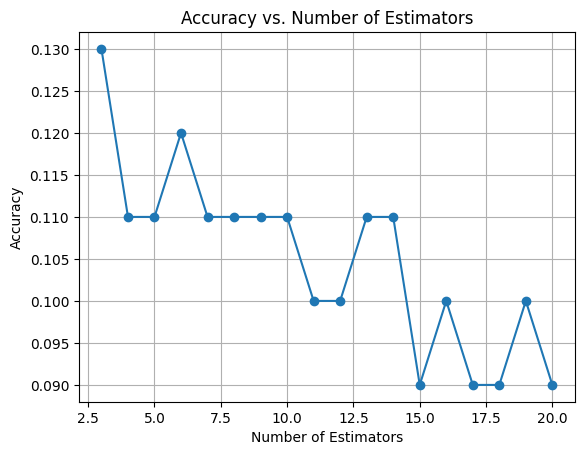

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # Added
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import warnings

# Suppress the DataConversionWarning
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

akurasi = []
n_est = []

# Loop over n_estimators from 3 to 20
for n_estimator in range(3, 21):
    # Initialize and fit the BaggingClassifier with GaussianNB as the base estimator
    clf = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=n_estimator, random_state=0)
    clf.fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = clf.predict(X_test)
    
    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    akurasi.append(round(accuracy,2))
    n_est.append(n_estimator)
    print(f"n_estimators: {n_estimator}, Accuracy: {accuracy:.2f}")

# Plotting the results
plt.plot(n_est, akurasi, marker='o')
plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b5b753c0-d20f-47b0-83d8-f944f2a8d374' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>